Lambda School Data Science

*Unit 2, Sprint 2, Module 4*

---

# Classification Metrics

## Assignment
- [ ] If you haven't yet, [review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Plot a confusion matrix for your Tanzania Waterpumps model.
- [ ] Continue to participate in our Kaggle challenge. Every student should have made at least one submission that scores at least 70% accuracy (well above the majority class baseline).
- [ ] Submit your final predictions to our Kaggle competition. Optionally, go to **My Submissions**, and _"you may select up to 1 submission to be used to count towards your final leaderboard score."_
- [ ] Commit your notebook to your fork of the GitHub repo.
- [ ] Read [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](http://archive.is/DelgE), by Lambda DS3 student Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.


## Stretch Goals

### Reading

- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)


### Doing
- [ ] Share visualizations in our Slack channel!
- [ ] RandomizedSearchCV / GridSearchCV, for model selection. (See module 3 assignment notebook)
- [ ] Stacking Ensemble. (See module 3 assignment notebook)
- [ ] More Categorical Encoding. (See module 2 assignment notebook)

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

/Users/johnrivera/.virtualenvs/jupyter/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
train.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,...,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


In [4]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline

In [7]:
#multi class classification problem
train['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [8]:
import numpy as np
import numpy as np
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_mostly_zeros = ['num_private']
    X = X.drop(cols_mostly_zeros,axis=1)
    cols_with_zeros = ['amount_tsh', 'gps_height', 'longitude','population','construction_year']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # drop duplicates,and anything unecessary
    X = X.drop(['quantity_group','waterpoint_type_group'],axis=1)
    
    #eliminate categorical variabels that seem redundant based on importances below
    X = X.drop(['management_group','extraction_type_group','permit','payment','recorded_by'],axis=1)
    
    # return the wrangled dataframe
    return X


train = wrangle(train)
test = wrangle(test)

In [9]:
#Feature Engineering 
def engineer_features(X):
    X = X.copy()
    X['quality_group_quantity'] = (X['water_quality']=='good') | (X['water_quality'] == 'quality_group')| (X['quantity'] == 'enough')
    X['water_quality_extraction_class'] = (X['water_quality'] == 'salty') & (X['extraction_type_class'] == 'other')
    X['quantity_dry_quality'] = (X['quantity']=='dry') | (X['water_quality'] == 'salty')
    X['construction_year_quality_insufficient'] = (X['quantity'] == 'insufficient') | (X['construction_year']<= 2004)
    X['construction_year_quality_sufficent'] = (X['quantity'] == 'sufficient') | (X['construction_year']>= 2004)
    return X
train = engineer_features(train)
test = engineer_features(test)
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,source,source_type,source_class,waterpoint_type,status_group,quality_group_quantity,water_quality_extraction_class,quantity_dry_quality,construction_year_quality_insufficient,construction_year_quality_sufficent
0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,Lake Nyasa,...,spring,spring,groundwater,communal standpipe,functional,True,False,False,True,False
1,8776,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,...,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional,False,False,False,True,True
2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,dam,dam,surface,communal standpipe multiple,functional,True,False,False,False,True
3,67743,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,machine dbh,borehole,groundwater,communal standpipe multiple,non functional,False,False,True,True,False
4,19728,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional,False,False,False,False,False


In [10]:
#Data Filtering
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id, or other redunant features
train_features = train.drop(columns=[target, 'id',	'source_class'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 21].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features 
print(features)


['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'scheme_management', 'extraction_type', 'extraction_type_class', 'management', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'waterpoint_type', 'quality_group_quantity', 'water_quality_extraction_class', 'quantity_dry_quality', 'construction_year_quality_insufficient', 'construction_year_quality_sufficent']


In [11]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_test = test[features]
X_train.shape,y_train.shape,X_test.shape

((59400, 27), (59400,), (14358, 27))

In [12]:
#identify hyper parameters before research cv
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [13]:
from scipy.stats import randint, uniform

In [14]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs = -1, random_state=40)

)

param_distributions = { 
    'randomforestclassifier__n_estimators': [150,300,400,500,600],
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__max_features': [0,5,10,20,37],
    'randomforestclassifier__min_samples_split': [0,5,10,36],
    'randomforestclassifier__min_samples_leaf': [2,4]
}
search = RandomizedSearchCV(
    pipeline, 
    param_distributions = param_distributions,
    n_iter = 20,
    cv=5,
    scoring ='accuracy',
    verbose = 1,
    return_train_score = True,
    n_jobs = -1
)

search.fit(X_train, y_train)
print('Cross-validation Best Score', search.best_score_)
print('Best Estimator:' ,search.best_params_)
print('Best Model', search.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 20.1min finished


Cross-validation Best Score 0.8101178451178452
Best Estimator: {'randomforestclassifier__n_estimators': 500, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 10, 'randomforestclassifier__criterion': 'gini'}
Best Model Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'extraction_type',
                                      'extraction_type_class', 'management',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'waterpoint_type'],
                                mapping=[{'col': 'basin',
                                          'data_type': dtype('O'),
                                          'mapping': Lake Nyasa                 1
La

In [26]:
pipeline = search.best_estimator_

In [27]:
pipeline

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'extraction_type',
                                      'extraction_type_class', 'management',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'waterpoint_type'],
                                mapping=[{'col': 'basin',
                                          'data_type': dtype('O'),
                                          'mapping': Lake Nyasa                 1
Lake Victoria              2
Pangan...
                                         {'col': 'waterpoint_type',
                                          'data_type': dtype('O'),
                                          'mapping': communal standpipe             1
communal standpipe multiple    2
hand pump     

In [29]:
from sklearn.metrics import plot_confusion_matrix, classification_report


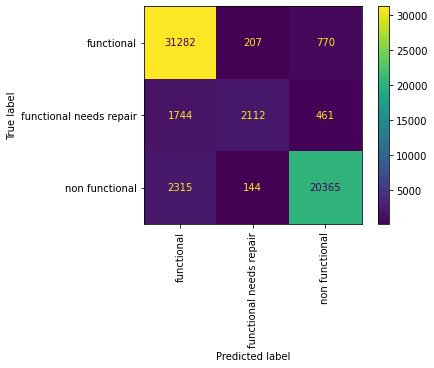

In [30]:
plot_confusion_matrix(pipeline, X_train, y_train, values_format='.0f', xticks_rotation='vertical')

In [31]:
model = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded_columns=encoder.transform(X_train).columns
importances = pd.Series(model.feature_importances_,encoded_columns)
importances.sort_values(ascending=False)[:20]

longitude                 0.128809
latitude                  0.125758
quantity                  0.087910
quantity_dry_quality      0.075989
construction_year         0.060594
gps_height                0.060150
waterpoint_type           0.057035
extraction_type_class     0.048259
extraction_type           0.040194
population                0.039955
district_code             0.028052
region                    0.027164
payment_type              0.026299
amount_tsh                0.022957
region_code               0.021808
source                    0.021199
source_type               0.019487
quality_group_quantity    0.017328
scheme_management         0.016285
basin                     0.016008
dtype: float64

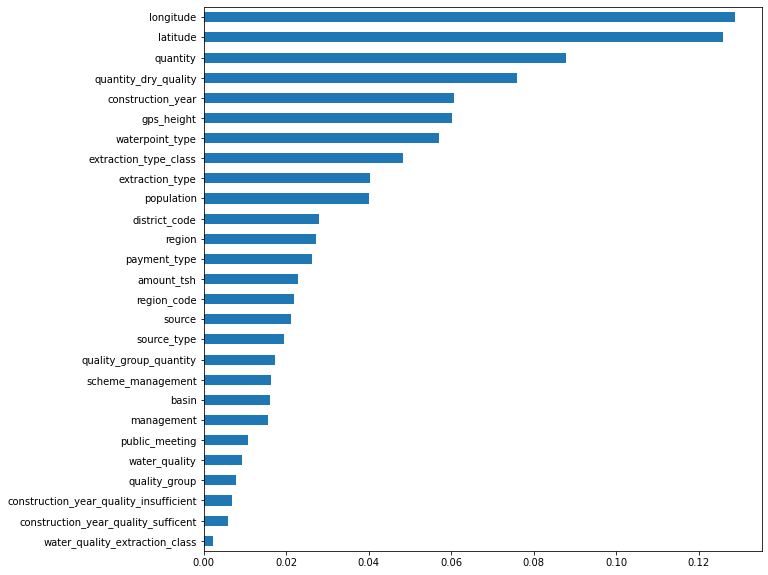

In [32]:
#plotting feature importances
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
importances.sort_values().plot.barh()

In [36]:
#Submission to Kaggle
y_pred = pipeline.predict(X_test)

In [37]:
DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)